# Homework for Section 8.7
## Your Name Here
#### Your Section number here

In [3]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## Problem 8.42

In [4]:
# your code here, per problem

phi = np.array([0, (1+np.sqrt(3))/2, (1-np.sqrt(3))/2, 0])
h = np.array([(1+np.sqrt(3))/4, (3+np.sqrt(3))/4, (3-np.sqrt(3))/4, (1-np.sqrt(3))/4])

def db2(phi, x):
    if x < 0:
        return 0
    if x > 3:
        return 0
    n = len(phi)
    denom = (n-1)/3
    i = int(x*denom)
    return phi[i]

def generate_db2(phi, h, k):
    if k < 10:
        temp = np.insert(phi, slice(1, None), 0) 
        for i in range(len(phi)-1):
            denom = 2*(len(phi)-1)/3
            x = (2*i+1)/denom
            temp[2*i+1] = sum([h[k]*db2(phi,2*x-k) for k in range(4)])
        
        return generate_db2(temp, h, k+1)
    else:
        return phi


In [5]:
phi = generate_db2(phi, h, 0)
phi

array([  0.00000000e+00,   3.01819002e-02,   4.41893688e-02, ...,
         8.43028628e-08,  -1.54284947e-08,   0.00000000e+00])

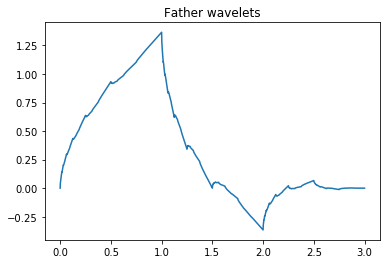

In [6]:
x = np.linspace(0,3,len(phi), endpoint=True)
plt.plot(x, phi)
plt.title("Father wavelets")
plt.show()

In [7]:
len(phi)

3073

In [13]:
def generate_db2_mother(psi, phi, h, k):
    if len(psi) == 0:
        temp = np.zeros(4)
        for i in range(4):
            x = i
            temp[i] = sum([(-1)**k*h[3-k]*db2(phi,2*x-k) for k in range(4)])
        return generate_db2_mother(temp,phi,h,k)
    elif k < 10:
        temp = np.insert(psi, slice(1, None), 0) 
        for i in range(len(psi)-1):
            denom = 2*(len(psi)-1)/3
            x = (2*i+1)/denom
            temp[2*i+1] = sum([(-1)**k*h[3-k]*db2(phi,2*x-k) for k in range(4)])
        
        return generate_db2_mother(temp, phi, h, k+1)
    else:
        return psi

In [14]:
psi = generate_db2_mother([], phi, h, 0)

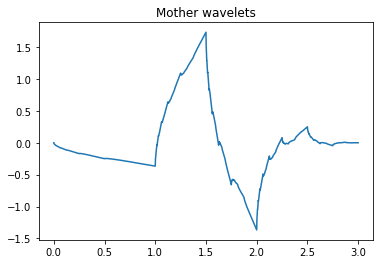

In [15]:
y = np.linspace(0,3,len(psi), endpoint=True)
plt.plot(y, psi)
plt.title("Mother wavelets")
plt.show()

In [16]:
len(psi)

3073

In [18]:
import scipy.integrate
scipy.integrate.simps(phi, x)

0.99999999999999956